#### Main code to analyse the .csv files from Simion

##### Libraries

In [1]:
#%pip install uncertainties
import pandas as pd
import math
import numpy as np
import sys
np.set_printoptions(threshold=sys.maxsize)
import csv
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib import cm
import matplotlib.pylab as pl
import matplotlib.gridspec as gridspec
from uncertainties import ufloat as uf
import uncertainties.unumpy as unp

#### Split big .csv into smaller ones (Optional)

In [4]:
T1_min = 23
T1_max = 23
T2_min = 26
T2_max = 42
T1_step = 0.1
T2_step = 0.1
T_stab = 200

#chunksize_split = int((T1_max - T1_min)/T1_step) * int((T2_max - T2_min)/T2_step) * 21
chunksize_split = 1 * int((T2_max - T2_min)/T2_step) * 201


#data = pd.read_csv('C:/Users/r0867867/Documents/IonTrap_v2/data/Big Emittance_new/data_Time(17_22_19_23_' + str(V_endcap) + '_200)_4_v2.csv', sep = ',', header=None, skip_blank_lines = True, names = ['IonNumber', 'ToF', 'KE'], skiprows = 1, chunksize = chunksize) #, on_bad_lines='skip'


def write_chunk(part, lines):
    with open('C:/Users/stefa/Desktop/IonTrap_v3/data/data_Time(' + str(T1_min) + '_' + str(T1_max) + '_' + str(T2_min) + '_' + str(T2_max) + '_' + str(part) + '_' + str(T_stab) + ')_3_v2_optimal_spread.csv', 'w') as f_out:
        f_out.write(header)
        f_out.writelines(lines)
with open("C:/Users/stefa/Desktop/IonTrap_v3/data/data_Time(23_23_26_42_0_200)_3_v2_optimal_spread.txt", "r") as f:
    count = 0
    header = f.readline()
    lines = []
    for line in f:
        count += 1
        lines.append(line)
        if count % chunksize_split == 0:
            write_chunk(count // chunksize_split, lines)
            lines = []
    # write remainder
    if len(lines) > 0:
        write_chunk((count // chunksize_split) + 1, lines)

##### True for VvsZ and False for T$_1$ vs T$_2$

In [2]:
chunksize = 201

answer = False

##### T$_1$ vs T$_2$ part

File for V$_{trap}$ = 0 V does not exist.
File for V$_{trap}$ = 0.5 V does not exist.


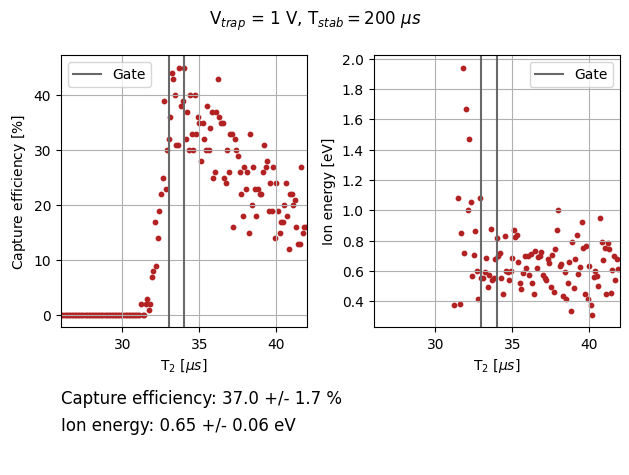

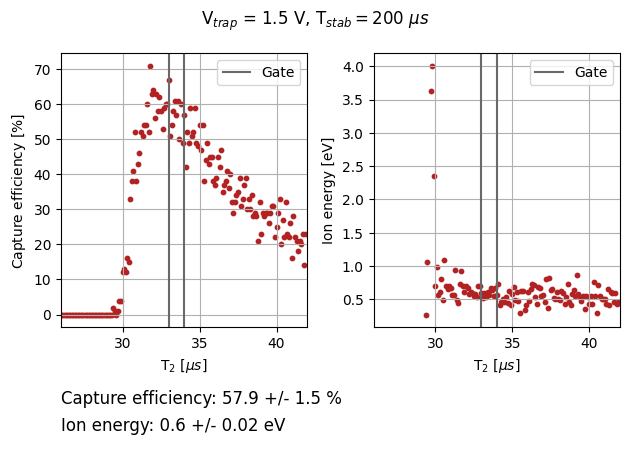

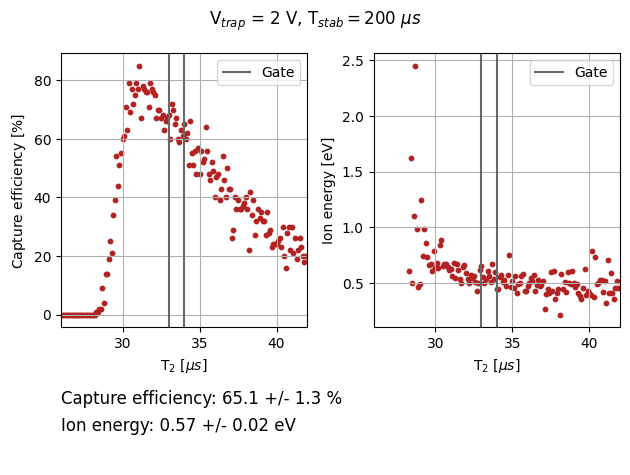

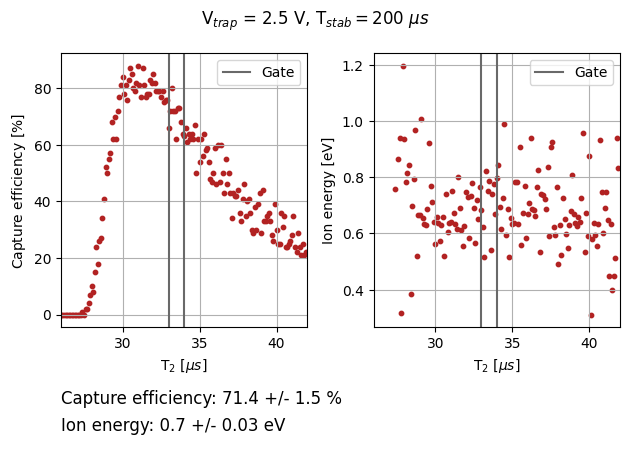

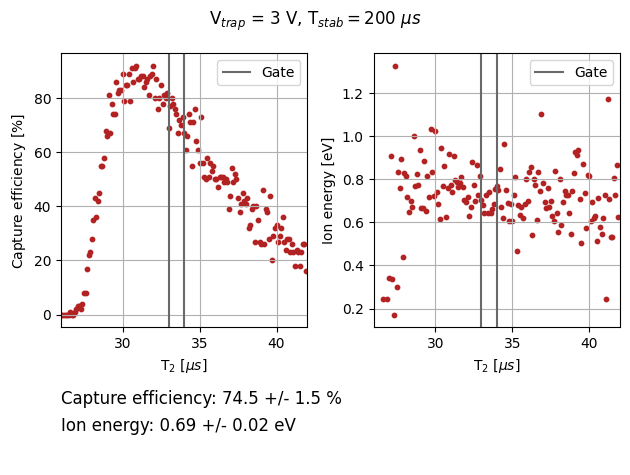

File for V$_{trap}$ = 3.5 V does not exist.


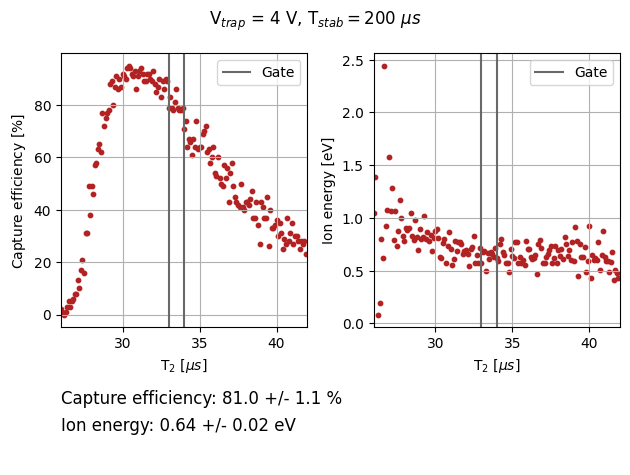

File for V$_{trap}$ = 4.5 V does not exist.


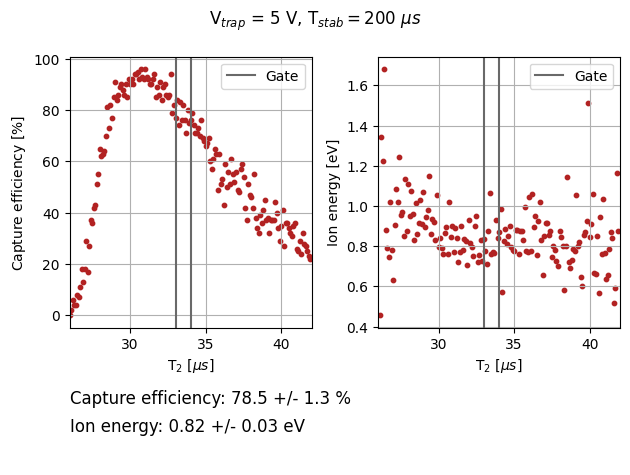

File for V$_{trap}$ = 5.5 V does not exist.


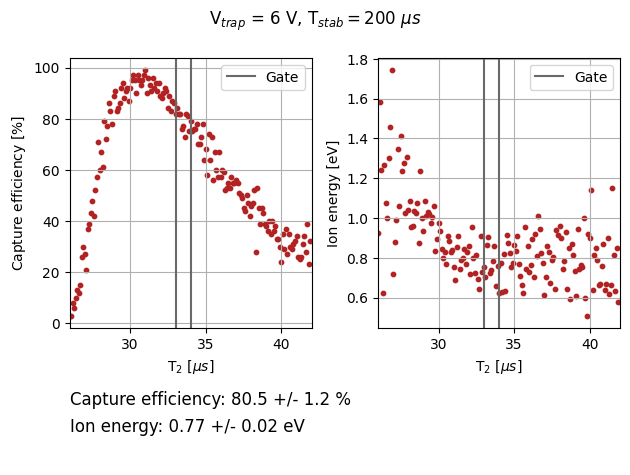

File for V$_{trap}$ = 6.5 V does not exist.


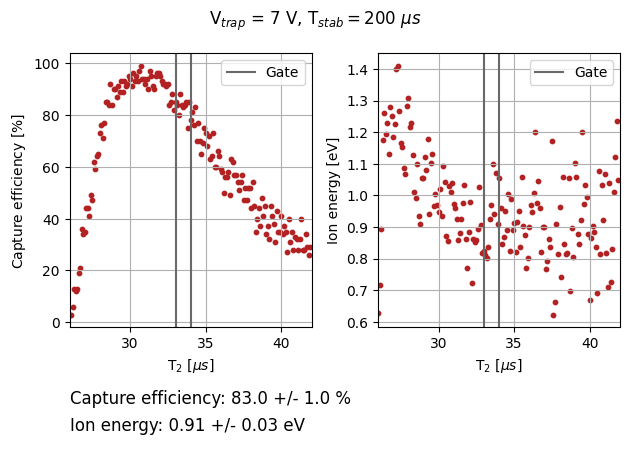

File for V$_{trap}$ = 7.5 V does not exist.


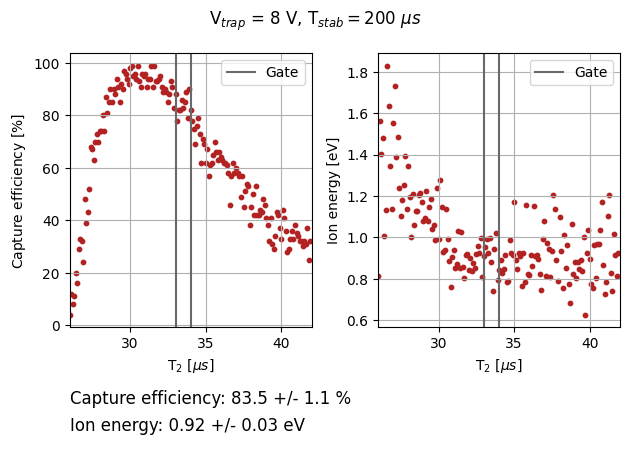

File for V$_{trap}$ = 8.5 V does not exist.


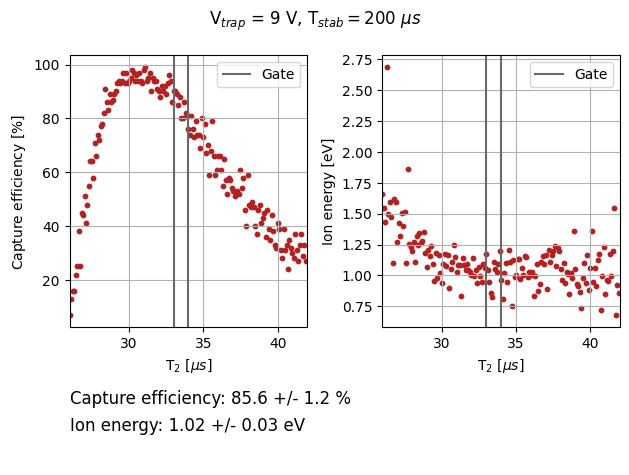

File for V$_{trap}$ = 9.5 V does not exist.


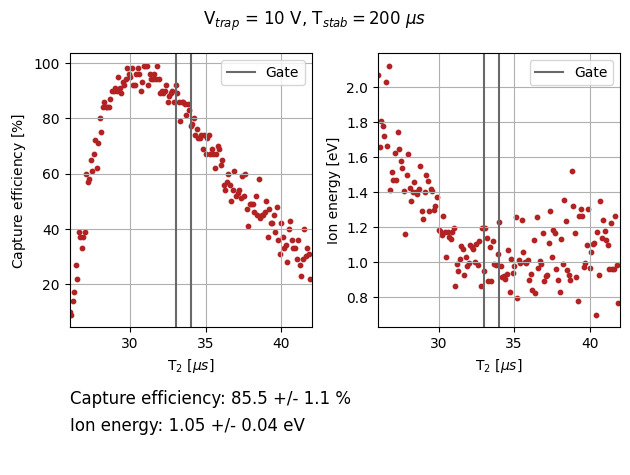

In [23]:
if answer == False:
    
    
    T1_min = 23
    T1_max = 23
    T2_min = 26
    T2_max = 42

    T1_step = 0.1
    T2_step = 0.1

    T_stab = 200
    V_endcap = 0
    matrix_stab = (int((T2_max - T2_min)/T2_step)) # add +1 for 0.05 step
    matrix_stab = np.zeros(matrix_stab)

    matrix_ke = (int((T2_max - T2_min)/T2_step)) # add +1 for 0.05 step
    matrix_ke = np.zeros(matrix_ke)

    KE_50_1 = [];
    KE_50_2 = [];
    KE_80_1 = [];
    KE_80_2 = [];
    KE_specific_1 = [];
    KE_specific_2 = [];
    sr_1 = [];
    sr_2 = [];
    
    Stab_Criterion_50 = [];
    Stab_Criterion_80 = [];
    Stab_Rate_value = [];
    Stab_Rate_error = [];

    T2_low_gate = 33
    T2_high_gate = 34

    x_KE = [];

    #for V_trap in range(4,5,1):
    for V_trap in np.linspace(0,10,21):
        try:
            data = None
            # data = pd.read_csv('C:/Users/r0867867/Documents/IonTrap_v3/initial_time.txt', sep = ',', header=None, skip_blank_lines = True, names = ['IonNumber', 'ToF', 'KE'], skiprows = 1, chunksize = chunksize) #, on_bad_lines='skip'    
            if (V_trap % 1 == 0.0):
                V_trap = int(V_trap)
                data = pd.read_csv('C:/Users/r0867867/Documents/IonTrap_v3/data/data_Time(' + str(T1_min) + '_' + str(T1_max) + '_' + str(T2_min) + '_' + str(T2_max) + '_' + str(V_endcap) + '_' + str(T_stab) + ')_' + str(V_trap) + '_v2.csv', sep = ',', header=None, skip_blank_lines = True, names = ['IonNumber', 'ToF', 'KE'], skiprows = 1, chunksize = chunksize) #, on_bad_lines='skip'    
            else:
                if (V_trap == 1.5):    
                    data = pd.read_csv('C:/Users/r0867867/Documents/IonTrap_v3/data/data_Time(' + str(T1_min) + '_' + str(T1_max) + '_' + str(T2_min) + '_' + str(T2_max) + '_' + str(V_endcap) + '_' + str(T_stab) + ')_' + '1_5' + '_v2.csv', sep = ',', header=None, skip_blank_lines = True, names = ['IonNumber', 'ToF', 'KE'], skiprows = 1, chunksize = chunksize) #, on_bad_lines='skip'
                elif (V_trap == 2.5):  
                    data = pd.read_csv('C:/Users/r0867867/Documents/IonTrap_v3/data/data_Time(' + str(T1_min) + '_' + str(T1_max) + '_' + str(T2_min) + '_' + str(T2_max) + '_' + str(V_endcap) + '_' + str(T_stab) + ')_' + '2_5' + '_v2.csv', sep = ',', header=None, skip_blank_lines = True, names = ['IonNumber', 'ToF', 'KE'], skiprows = 1, chunksize = chunksize) #, on_bad_lines='skip'
                else:
                    data = pd.read_csv('C:/Users/r0867867/Documents/IonTrap_v3/data/data2_Time(' + str(T1_min) + '_' + str(T1_max) + '_' + str(T2_min) + '_' + str(T2_max) + '_' + str(V_endcap) + '_' + str(T_stab) + ')_' + '2_5' + '_v2.csv', sep = ',', header=None, skip_blank_lines = True, names = ['IonNumber', 'ToF', 'KE'], skiprows = 1, chunksize = chunksize) #, on_bad_lines='skip'
            #V_trap = int(V_trap)
            x_KE.append(V_trap)

            i = 0
            
            KE = [];
            d = [];
            d_specific = [];
            sr = [];
            d_50 = [];
            d_80 = [];
            d_50_mean = [];
            d_80_mean = [];
            d_50_error = [];
            d_80_error = [];

            Stab_number_50 = [];
            Stab_number_80 = [];
            
            Total_bins = len(matrix_ke)
            
            Counter = 0
            
            for chunk in data:
                Counter = Counter + 1

                KE_chunk = [];
                chunk['ToF'].astype(float)
                chunk['KE'].astype(float)

                part = chunk.IonNumber.str.count('UNSTABLE').sum()
                KE_chunk = chunk.loc[chunk['ToF'] >= (int(T_stab) - 5), 'KE']

                matrix_stab[i] =  ((chunksize - 1)/2 - part)/((chunksize - 1)/2) * 100

                if (matrix_stab[i] >= 0.4):
                    Stab_number_50.append(matrix_stab[i])

                if (matrix_stab[i] >= 0.8):
                    Stab_number_80.append(matrix_stab[i]) 

                if (((chunksize - 1)/2 - part) != 0): # KE of chunk with higher than 0 Stability
                    matrix_ke[i] = sum(KE_chunk)/((chunksize - 1)/2 - part)
                    d.append(matrix_ke[i])

                    if ((Counter >= (T2_low_gate - T2_min)/T2_step) and (Counter < (T2_high_gate - T2_min)/T2_step)):
                        d_specific.append(matrix_ke[i])
                        sr.append(matrix_stab[i])

                else:
                    matrix_ke[i] = np.nan


                if (((chunksize - 1)/2 - part) >= 80): # KE of chunk with higher than 80% Stability
                    d_80.append(sum(KE_chunk)/((chunksize - 1)/2 - part))

                if (((chunksize - 1)/2 - part) >= 40): # KE of chunk with higher than 40% Stability
                    d_50.append(sum(KE_chunk)/((chunksize - 1)/2 - part))


                i += 1
        
            x = np.arange(T2_min, T2_max, T2_step)  # add Ti_step

            Stab_Criterion_50.append(len(Stab_number_50)/Total_bins) 
            Stab_Criterion_80.append(len(Stab_number_80)/Total_bins) 

            ## My new addition:
            Stab_Rate_value.append(sum(matrix_stab)/len(matrix_stab))
            Stab_Rate_error.append(np.std(matrix_stab)/np.sqrt(len(matrix_stab)))

            ## End of my new addition

            if (len(d_50) > 0):
                d_50_mean = sum(d_50)/len(d_50)
                d_50_error = np.std(d_50)/np.sqrt(len(d_50))
            else:
                d_50_mean = 0
                d_50_error = 0

            if (len(d_80) > 0):
                d_80_mean = sum(d_80)/len(d_80)
                d_80_error = np.std(d_80)/np.sqrt(len(d_80))
            else:
                d_80_mean = 0
                d_80_error = 0

            if (len(d_specific) > 0):
                d_specific_mean = sum(d_specific)/len(d_specific)
                d_specific_error = np.std(d_specific)/np.sqrt(len(d_specific))
            else:
                d_specific_mean = 0
                d_specific_error = 0

            if (len(sr) > 0):
                sr_mean = sum(sr)/len(sr)
                sr_error = np.std(sr)/np.sqrt(len(sr))
            else:
                sr_mean = 0
                sr_error = 0
                

            KE_50_1.append(d_50_mean)
            KE_50_2.append(d_50_error)
            KE_80_1.append(d_80_mean)
            KE_80_2.append(d_80_error)
            KE_specific_1.append(d_specific_mean)
            KE_specific_2.append(d_specific_error)
            sr_1.append(sr_mean)
            sr_2.append(sr_error)

            fig = plt.figure()
            fig.suptitle('V$_{trap}$ = ' + str(V_trap) + ' V, T$_{stab} = $' + str(T_stab) + ' $\mu s$', fontsize = 12)
            gs = gridspec.GridSpec(2, 2, height_ratios = [4,1])
            
            ax1=fig.add_subplot(gs[0,0])
            ax2=fig.add_subplot(gs[0,1])
            ax3=fig.add_subplot(gs[1,:])
            #ax3=fig.add_subplot(gs[1,0])
            #ax4=fig.add_subplot(gs[1,:])

            ax1.scatter(x, matrix_stab, color = 'firebrick', s = 10)
            ax1.set_xlabel('T$_2$ [$\mu s$]')
            ax1.set_ylabel('Capture efficiency [$\%$]')
            ax1.grid()
            ax1.axvline(x=T2_low_gate, color = 'dimgray', linestyle = '-', label = 'Gate')
            ax1.axvline(x=T2_high_gate, color = 'dimgray', linestyle = '-')
            ax1.set_xlim(T2_min, T2_max)

            ax2.scatter(x, matrix_ke, color = 'firebrick', s = 10)
            ax2.set_xlabel('T$_2$ [$\mu s$]')
            ax2.set_ylabel('Ion energy [eV]')
            ax2.set_xlim(T2_min, T2_max)
            ax2.axvline(x=T2_low_gate, color = 'dimgray', linestyle = '-', label = 'Gate')
            ax2.axvline(x=T2_high_gate, color = 'dimgray', linestyle = '-')
            ax2.grid()

            ax3.text(0, 0.9, 'Capture efficiency: ' + str(round(sum(sr)/len(sr),3)) + ' +/- ' + str(round(np.std(sr)/np.sqrt(len(sr)),1)) + ' %', fontsize = 12)
            ax3.text(0, 0.5, 'Ion energy: ' + str(round(d_specific_mean,2)) + ' +/- ' + str(round(d_specific_error,2)) + ' eV', fontsize = 12) #, bbox=dict(facecolor='red', alpha=0.5)
            
            ax3.axis('off')
            
            #ax1.text(0, 0.5, 'S.R. = ' + str(round(100*sum(sr)/len(sr),3)) + ' +/- ' + str(round(100*np.std(sr)/np.sqrt(len(sr)),1)) + ' %', fontsize = 12)


            #n, bins, patches = ax3.hist(x=d, bins='auto', color='#0504aa', alpha=0.7, rwidth=0.8)
            #ax3.set_xlim(0,3)
            #ax3.set_xlabel('<KE> [eV]')
            #ax3.set_ylabel('Counts')
            #ax3.set_title('Mean = ' + str(round(sum(d)/len(d),2)) + ' eV')

            #n, bins, patches = ax4.hist(x=d_specific, bins='auto', color='#0504aa', alpha=0.7, rwidth=0.8)
            #ax4.set_xlim(0,2)
            #ax4.set_xlabel('<KE> [eV]')
            #ax4.set_ylabel('Counts')
            #ax4.set_title('Mean = ' + str(round(sum(d_specific)/len(d_specific),2)) + ' eV')
            ax1.legend()
            ax2.legend()
            plt.tight_layout()
            
            #plt.savefig('C:/Users/r0867867/Documents/IonTrap_v3/Figures/data_Time(' + str(T1_min) + '_' + str(T1_max) + '_' + str(T2_min) + '_' + str(T2_max) + '_' + str(V_endcap) + '_' + str(T_stab) + ')_' + str(V_trap) + '_v2.png', dpi = 150)
            plt.show()

        except:
            print('File for V$_{trap}$ = ' + str(V_trap) + ' V does not exist.')

#### Let's repeat it using the new KE and their errors





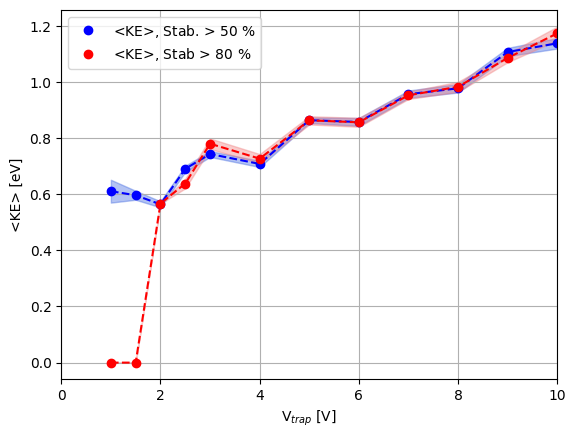

In [24]:
KE_50 = unp.uarray(KE_50_1, KE_50_2)
KE_80 = unp.uarray(KE_80_1, KE_80_2)
KE_specific = unp.uarray(KE_specific_1, KE_specific_2)  ## The one for the time gate
sr = unp.uarray(sr_1, sr_2)

plt.errorbar(x_KE, unp.nominal_values(KE_50), color = 'blue', label = '<KE>, Stab. > 50 $\%$', fmt = 'o')
plt.errorbar(x_KE, unp.nominal_values(KE_80), color = 'red', label = '<KE>, Stab > 80 $\%$', fmt = 'o')
plt.plot(x_KE, unp.nominal_values(KE_50), color = 'blue', linestyle = '--')
plt.plot(x_KE, unp.nominal_values(KE_80), color = 'red', linestyle = '--')

plt.fill_between(x_KE, unp.nominal_values(KE_50) + unp.std_devs(KE_50), unp.nominal_values(KE_50) - unp.std_devs(KE_50), color = 'royalblue', alpha = 0.4)
plt.fill_between(x_KE, unp.nominal_values(KE_80) + unp.std_devs(KE_80), unp.nominal_values(KE_80) - unp.std_devs(KE_80), color = 'lightcoral', alpha = 0.4)

plt.xlabel('V$_{trap}$ [V]')
plt.ylabel('<KE> [eV]')
plt.legend()
plt.grid()
#plt.ylim(0.7, 1.5)
plt.xlim(0,10)
plt.show()



#### KE percent loss

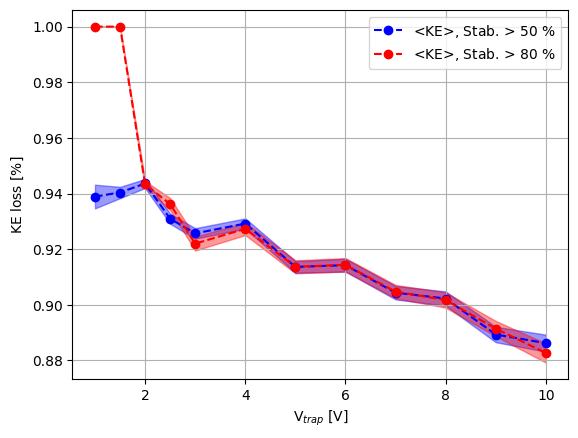

In [19]:
E_beam = uf(10,0.2123) ## within 1 sigma
KE_loss_50 = (E_beam - KE_50)/E_beam
KE_loss_80 = (E_beam - KE_80)/E_beam

plt.plot(x_KE, unp.nominal_values(KE_loss_50), marker = 'o', color = 'blue', linestyle = '--', label = '<KE>, Stab. > 50 $\%$')
plt.plot(x_KE, unp.nominal_values(KE_loss_80), marker = 'o', color = 'red', linestyle = '--', label = '<KE>, Stab. > 80 $\%$')

plt.fill_between(x_KE, unp.nominal_values(KE_loss_50) - unp.std_devs(KE_loss_50), unp.nominal_values(KE_loss_50) + unp.std_devs(KE_loss_50), color = 'blue', alpha = 0.4)
plt.fill_between(x_KE, unp.nominal_values(KE_loss_80) - unp.std_devs(KE_loss_80), unp.nominal_values(KE_loss_80) + unp.std_devs(KE_loss_80), color = 'red', alpha = 0.4)

plt.xlabel('V$_{trap}$ [V]')
plt.ylabel('KE loss [$\%$]')
#plt.ylim(0.84,0.93)
plt.legend()
plt.grid()
plt.show()

#### Stability Criterion

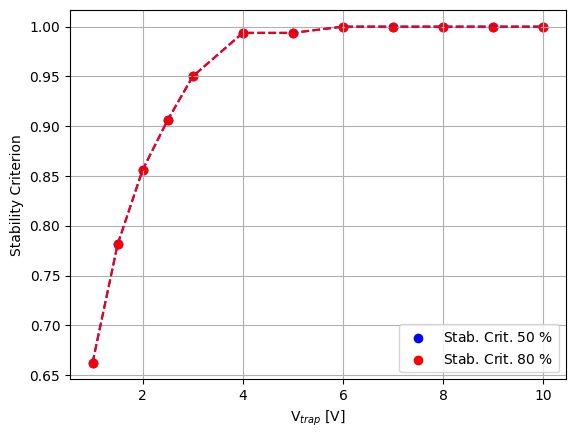

In [20]:
plt.scatter(x_KE, Stab_Criterion_50, color = 'blue', marker = 'o', label = 'Stab. Crit. 50 $\%$')
plt.scatter(x_KE, Stab_Criterion_80, color = 'red', marker = 'o', label = 'Stab. Crit. 80 $\%$')
plt.plot(x_KE, Stab_Criterion_50, color = 'blue', linestyle = '--')
plt.plot(x_KE, Stab_Criterion_80, color = 'red', linestyle = '--')

plt.legend()
plt.grid()
plt.xlabel('V$_{trap}$ [V]')
plt.ylabel('Stability Criterion')
plt.show()


#### Stability Rate

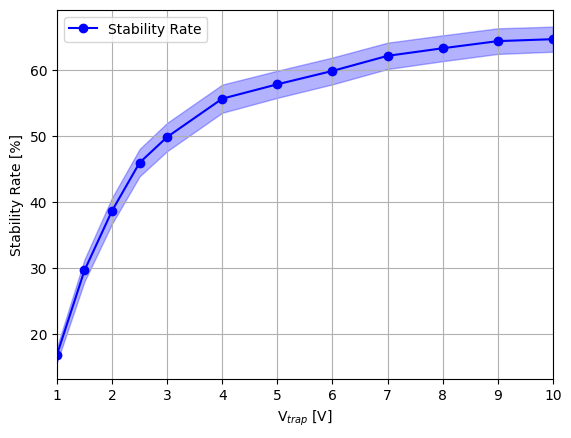

In [21]:
y_filled_low = list((x - y) for x, y in zip(Stab_Rate_value, Stab_Rate_error))
y_filled_high = list(sum(x) for x in zip(Stab_Rate_value, Stab_Rate_error))

plt.plot(x_KE, Stab_Rate_value, color = 'blue', marker = 'o', label = 'Stability Rate')
plt.fill_between(x_KE, y_filled_low, y_filled_high, color = 'blue', alpha = 0.3)
plt.xlim(1,10)
plt.legend()
plt.grid()
plt.xlabel('V$_{trap}$ [V]')
plt.ylabel('Stability Rate [%]')
plt.show()

#### All together

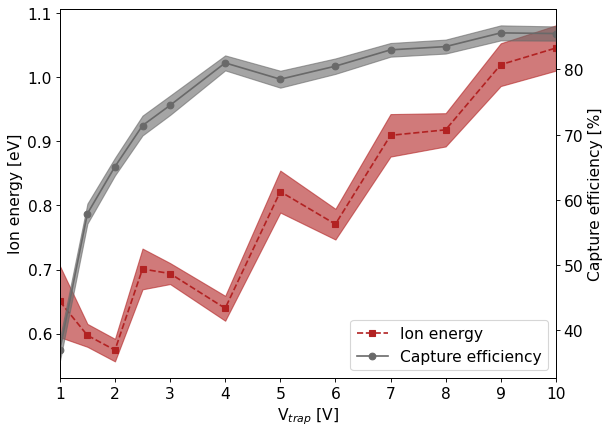

In [31]:
fig, ax1 = plt.subplots(figsize=(8, 6), dpi=80)
ax2 = ax1.twinx()

ax1.plot(x_KE, unp.nominal_values(KE_specific), marker = 's', color = 'firebrick', linestyle = '--', label = 'Ion energy')
ax1.fill_between(x_KE, unp.nominal_values(KE_specific) - unp.std_devs(KE_specific), unp.nominal_values(KE_specific) + unp.std_devs(KE_specific), color = 'firebrick', alpha = 0.6)

plt.plot(x_KE, unp.nominal_values(sr), color = 'dimgray', marker = 'o', label = 'Capture efficiency')
plt.fill_between(x_KE, unp.nominal_values(sr) - unp.std_devs(sr),unp.nominal_values(sr) + unp.std_devs(sr), color = 'dimgray', alpha = 0.6)

ax1.set_xlabel('V$_{trap}$ [V]', fontsize=14)
ax1.set_ylabel('Ion energy [eV]', fontsize=14)
ax2.set_ylabel('Capture efficiency [%]', fontsize=14)

ax1.tick_params(labelsize = 14)
ax2.tick_params(labelsize = 14)

lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc = 0)
#ax1.grid()
#ax1.set_ylim(0.75, 1.8)
#ax2.set_ylim(0,0.13)
ax1.set_xlim(1,10)
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc = 4, ncol = 1, fontsize = 14)
plt.savefig('C:/Users/r0867867/Documents/IonTrap_v3/Figures/no_endcap_various_vtrap_v2.png', dpi = 150)

plt.show()